In [1]:
#!../xptopics/bin/python
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# import the class MLP which is inherited from torch.nn.module. 
# this function is defined in another file.
from MLP_module import MLP, CustomDataset

# Solve item 5.8.1 
# width = 18, depth = 6, input_dim = 1, out_dim = 1
model_item1 = MLP(input_dim=1, out_dim=1, width=18, depth=6, activation='tanh', initialization='normal')

# Define the L2 regularization parameter
l2_lambda = 1e-7

# Now solving item 5.8.2
# Create a dataset with 100 points in the range [0, 1]
x_train = torch.linspace(0, 1, 100).reshape(-1, 1).requires_grad_(True)

In [2]:
# Define the loss function
def loss_fun(x_train, model, Pe, Da, lambda_b):
    u = model(x_train)
    u_x = torch.autograd.grad(
        u, x_train,
        grad_outputs=torch.ones_like(x_train),
        create_graph=True)[0]
    u_xx = torch.autograd.grad(
        u_x, x_train,
        grad_outputs=torch.ones_like(x_train),
        create_graph=True)[0]
    R_int = torch.mean(torch.square(u_xx - Pe * u_x + Da * u * (1.0 - u)))
    R_bc = torch.square(u[0]) + torch.square(u[-1] - 1.0)

    return R_int + lambda_b*R_bc, R_int.item(), R_bc.item()

In [3]:
# Start working on 5.8.3
# Define the optimizer and learning rate
eta = 1e-4 # learning rate
optimizer = optim.Adam(model_item1.parameters(), lr=eta, weight_decay=l2_lambda)

# Define the parameters
lambda_b = 10

Pe_values = [0.01, 20, 0.01, 15] #Pe values
Da_values = [0.01, 0.01, 60, 40] #Da values

num_epochs = 40000 # number of epochs

Epoch 0: Interior Loss: 0.011814454570412636, Boundary Loss: 4.953509460392524e-07, Total Loss: 0.011819408275187016
Epoch 5000: Interior Loss: 0.008914614096283913, Boundary Loss: 1.2090779932805162e-08, Total Loss: 0.008914735168218613
Epoch 10000: Interior Loss: 0.006948287598788738, Boundary Loss: 7.582812600048783e-09, Total Loss: 0.006948363501578569
Epoch 15000: Interior Loss: 0.005673086736351252, Boundary Loss: 7.633499876646965e-08, Total Loss: 0.005673849955201149
Epoch 20000: Interior Loss: 0.004290101584047079, Boundary Loss: 1.049438935751823e-08, Total Loss: 0.004290206357836723
Epoch 25000: Interior Loss: 0.0032674362882971764, Boundary Loss: 1.5279866261153074e-10, Total Loss: 0.003267437918111682
Epoch 30000: Interior Loss: 0.00266559817828238, Boundary Loss: 1.579977038090874e-09, Total Loss: 0.0026656140107661486
Epoch 35000: Interior Loss: 0.0021190172992646694, Boundary Loss: 3.980460405728081e-11, Total Loss: 0.0021190177649259567


Text(0.5, 1.0, 'Losses vs Epochs')

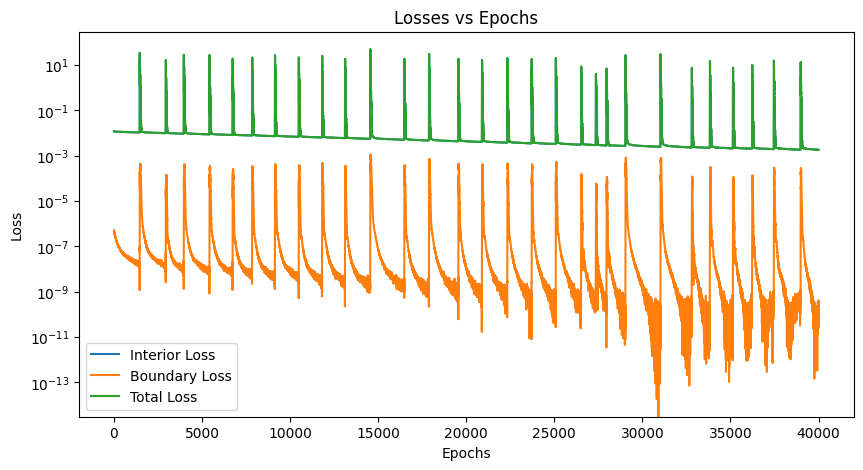

In [5]:
interior_losses = []
boundary_losses = []
total_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad() # zero the gradients
    # Compute the interior and boundary losses
    loss, interior_loss, boundary_loss = loss_fun(x_train, model_item1, Pe_values[0], Da_values[0], lambda_b)
    loss.backward() # backpropagation
    optimizer.step() # update the weights
    # Store the losses
    interior_losses.append(interior_loss)
    boundary_losses.append(boundary_loss)
    total_losses.append(loss.item())

    # Print the losses every 1000 epochs
    if epoch % 5000 == 0:
        print(f"Epoch {epoch}: Interior Loss: {interior_loss}, Boundary Loss: {boundary_loss}, Total Loss: {loss.item()}")
        # Save the model every 5000 epochs

# Plot the losses
plt.figure(figsize=(10, 5))
plt.semilogy(interior_losses, label='Interior Loss')
plt.semilogy(boundary_losses, label='Boundary Loss')
plt.semilogy(total_losses, label='Total Loss')
plt.legend()
#plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses vs Epochs')   